In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def agepft_to_age_by_pft(scpf_var, dataset):
    n_age = len(dataset.age)
    ds_out = (scpf_var.rolling(levagepft=n_age, center=False)
            .construct("age")
            .isel(levagepft=slice(n_age-1, None, n_age))
            .rename({'levagepft':'fates_levpft'})
            .assign_coords({'age':dataset.age}))
    ds_out.attrs['long_name'] = scpf_var.attrs['long_name']
    ds_out.attrs['units'] = scpf_var.attrs['units']
    return(ds_out)

In [3]:
fin = xr.open_dataset('Biomass_patch_Age_1950_2014.nc')

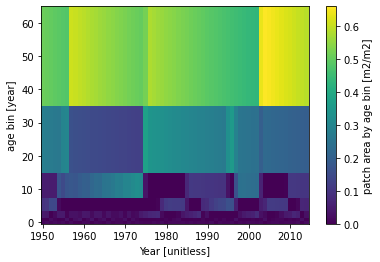

In [4]:
fin.PATCH_AREA_BY_AGE.plot(x='year', y='age')

In [5]:
BIOMASS_AGE_PFT = agepft_to_age_by_pft(fin.BIOMASS_AGEPFT, fin)

In [6]:
pftratio = BIOMASS_AGE_PFT.isel(fates_levpft=0) / BIOMASS_AGE_PFT.isel(fates_levpft=1)
pftratio.attrs['long_name'] = 'fraction of biomass in PFT 1'

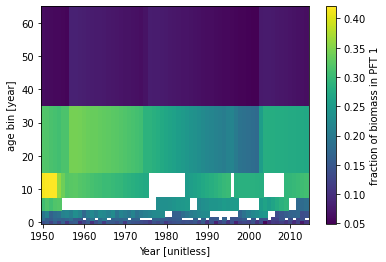

In [7]:
pftratio.plot(x='year', y='age')

In [8]:
pftratio_ave = BIOMASS_AGE_PFT.isel(fates_levpft=0).mean(dim='year') / BIOMASS_AGE_PFT.isel(fates_levpft=1).mean(dim='year')
pftratio_ave.attrs['long_name'] = 'fraction of biomass in PFT 1'

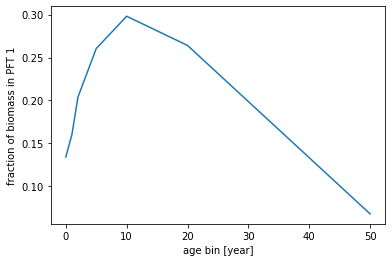

In [9]:
pftratio_ave.plot()

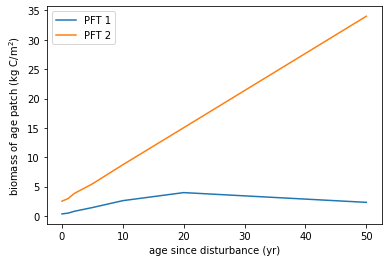

In [10]:
plt.plot(fin.age, BIOMASS_AGE_PFT.isel(fates_levpft=0).mean(dim='year') / fin.PATCH_AREA_BY_AGE.mean(dim='year'))
plt.plot(fin.age, BIOMASS_AGE_PFT.isel(fates_levpft=1).mean(dim='year') / fin.PATCH_AREA_BY_AGE.mean(dim='year'))


plt.xlabel('age since disturbance (yr)')
plt.ylabel('biomass of age patch (kg C/m$^2$)')
plt.legend(['PFT 1','PFT 2'])
